In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Define linear regression model

class LinearRegression(tf.keras.Model):
  def __init__(self, num_inputs, num_outputs):
    super(LinearRegression, self).__init__()
    self.W = tf.Variable(
        tf.random_normal_initializer()((num_inputs, num_outputs)))
    self.b = tf.Variable(tf.zeros(num_outputs))
    self.params = [self.W, self.b]

  def call(self, inputs):
    return tf.matmul(inputs, self.W) + self.b

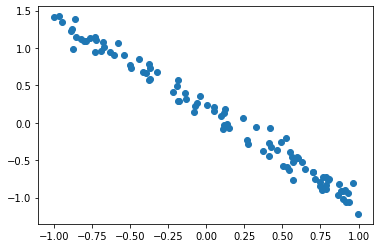

In [4]:
# Create a dataset
N = 100
D = 1
K = 1
X = np.random.random((N, D)) * 2 - 1
w = np.random.randn(D, K)
b = np.random.randn()
Y = X.dot(w) + b + np.random.randn(N, 1) * 0.1
plt.scatter(X, Y)

In [5]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)


def get_loss(model, inputs, targets):
  predictions = model(inputs)
  error = targets - predictions
  return tf.reduce_mean(tf.square(error))

def get_grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    # calculate the loss
    loss_value = get_loss(model, inputs, targets)
  
  # return gradient
  return tape.gradient(loss_value, model.params)

# Create and train the model
model = LinearRegression(D, K)

# Print the params before training
print("Initial params:")
print(model.W)
print(model.b)

Initial params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.01063928]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


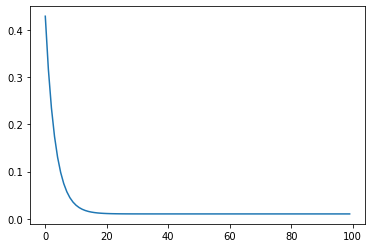

In [6]:
# Store the losses here
losses = []

# Create an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)

# Run the training loop
for i in range(100):
  # Get gradients
  grads = get_grad(model, X, Y)
  
  # Do one step of gradient descent: param <- param - learning_rate * grad
  optimizer.apply_gradients(zip(grads, model.params))
  
  # Store the loss
  loss = get_loss(model, X, Y)
  losses.append(loss)

plt.plot(losses)

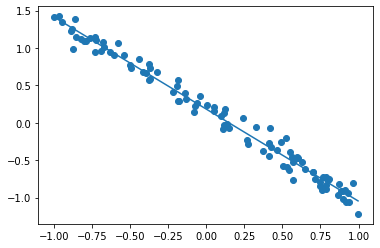

In [7]:
x_axis = np.linspace(X.min(), X.max(), 100)
y_axis = model.predict(x_axis.reshape(-1, 1)).flatten()

plt.scatter(X, Y)
plt.plot(x_axis, y_axis)

In [8]:
print("Predicted params:")
print(model.W)
print(model.b)
print("True params:")
w, b

Predicted params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-1.233037]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.18461013], dtype=float32)>
True params:


(array([[-1.24097177]]), 0.17878495742861394)